# Week4 Day5 Core Mission 2

## 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [4]:
stats = pd.read_csv('./data_core2/charcters_stats.csv')
stats.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


## 1) 수치의 합이 가장 큰 캐릭터

In [5]:
stats.iloc[stats.Total.idxmax()].Name

'Martian Manhunter'

## 2) 좋은 캐릭터와 나쁜 캐릭터의 능력치 수치 분포

In [6]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          611 non-null    object
 1   Alignment     608 non-null    object
 2   Intelligence  611 non-null    int64 
 3   Strength      611 non-null    int64 
 4   Speed         611 non-null    int64 
 5   Durability    611 non-null    int64 
 6   Power         611 non-null    int64 
 7   Combat        611 non-null    int64 
 8   Total         611 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 43.1+ KB


Alignment가 neutral이거나 nan인 캐릭터 제외

In [7]:
stats_gb = stats[(stats.Alignment == 'bad') | (stats.Alignment == 'good')]
stats_gb.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


밀도함수 활용

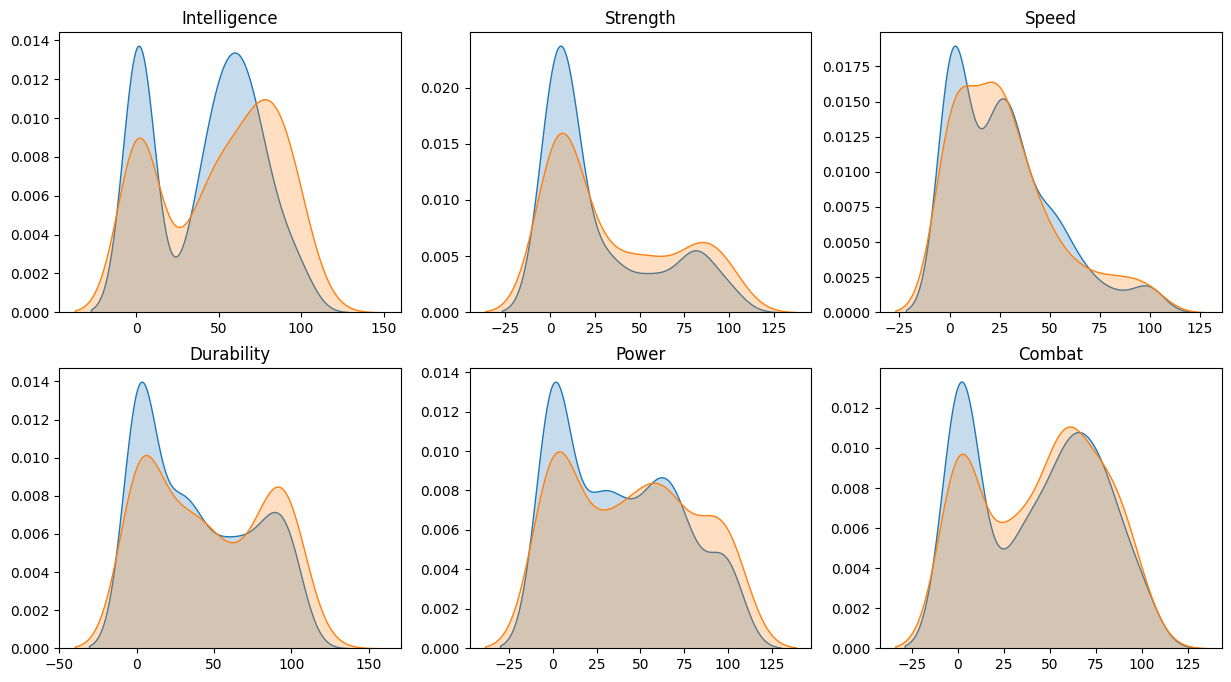

In [8]:
plt.figure(figsize=(15, 8))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.kdeplot(data=stats_gb[stats_gb.Alignment == 'good'], x=stats_gb.columns[i+1], shade=True)
    sns.kdeplot(data=stats_gb[stats_gb.Alignment == 'bad'], x=stats_gb.columns[i+1], shade=True)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(stats_gb.columns[i+1])

plt.show()

swarmplot 활용

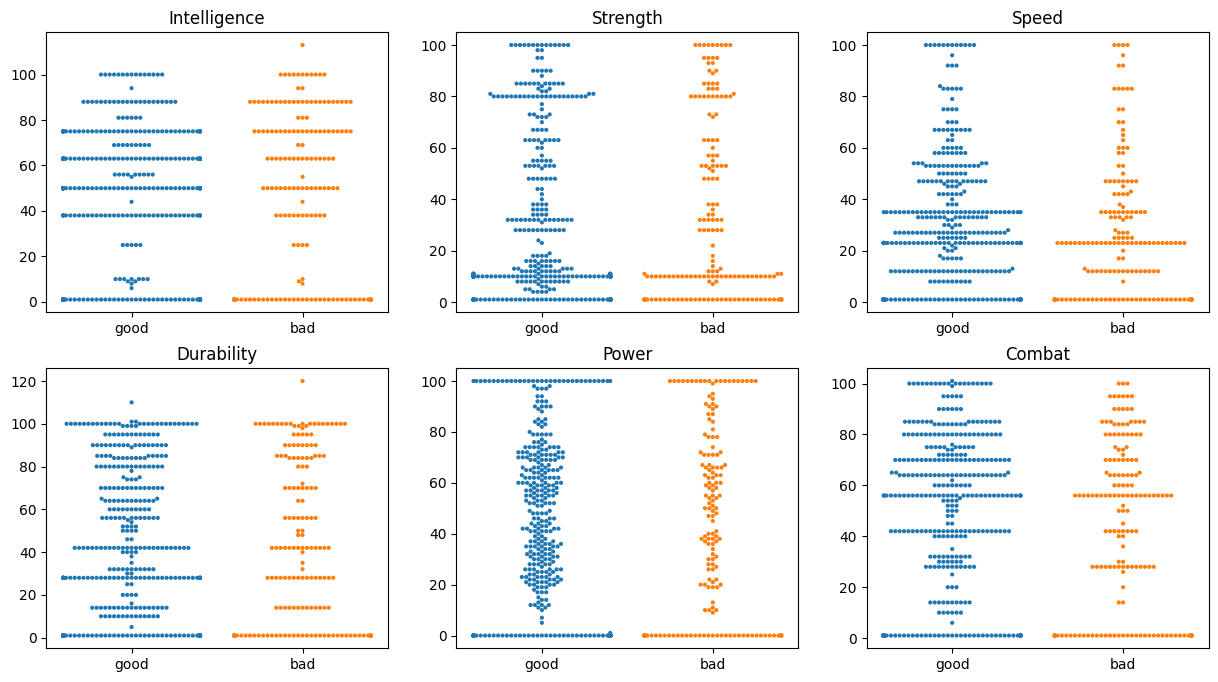

In [10]:
plt.figure(figsize=(15, 8))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    sns.swarmplot(data=stats_gb, y=stats_gb.columns[i+1], x='Alignment', hue='Alignment', legend=False, size=3)
    plt.ylabel('')
    plt.xlabel('')
    plt.title(stats_gb.columns[i+1])

plt.show()